# 二项式分布（Binomial Distribution）
***
## 定义
让我们来看看玩板球这个例子。假设你今天赢了一场比赛．这表示一个成功的事件。你再比了一场，但你输了。如果你今天赢了一场比赛，但这并不表示你明天肯定会赢。我们来分配一个随机变量 X，用干表示赢得的次数。 X 可能的值是多少呢？它可以是任意值，这取决于你参加比赛的次数。     
只有两种可能的结果，成功和失败。因此，成功的概率=0.5，失败的概率可以很容易地计算得到：q=1-p=0.5。     
二项式分布就是只有两个可能结果的分布，比如成功或夫败、得到或者失去、赢或败，每一次尝试成功和夫败的概率相等。     
结果有可能不一定相等。如果在实验中成功的概率为 0.2 ，则失败的概牢可以很容易地计算得到 q=1-0.2=0.8。     
每一次尝试都是独立的，囚为前一次投掷的结果不能决定或影响当前投掷的结果．只有两个可能的结果井且重复 n 次的实验叫做二项式。二项分布的参数是 n 和 p , 共中 n 足试验的总数， p 是每次试骑成功的概率。    

在上述说明的基础上．二项式分布的属性包括：     
- 每次试验都是独立的。    
- 在试验中只有两个可能的结果：成功或失败。    
- 总共进行了 n 次相同的试验。     
- 所有试验成功和失败的概率是相同的。（试脸是一样的）

## Definition
>The Binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own boolean-valued outcome. $ ^{[1]}$.

## Formula
The probability mass function of a Bernoulli distributed random variable is defined as:
$$ Binom(k|N,p) = {N \choose k}p^{k}(1-p)^{N-k} $$
其中 $N \cdot p$ 表示分布的均值，npq表示方差.    

两类概率函数的说明：   
- PMF（概率质量函数）:是对离散随机变垦的定义，是离散随机变量在各个特定取值的概率.该函数通俗来说,就是对于一个离散型概率事件来说,使用这个函数来求它的各个成功事件结果的概率。    
- PDF（概率密度函数）:是对连续性随机变量的定义.与PMF不同的是PDF在特定点上的值并不是该点的概率，连续随机概率事件只能求一段区域内发生事件的概率,通过对这段事件进行积分来求;通俗来说,使用这个概率密度函数将想要求慨率的区间的临界点（最大值和最小值）带入求枳分.就是该区间的概率。   

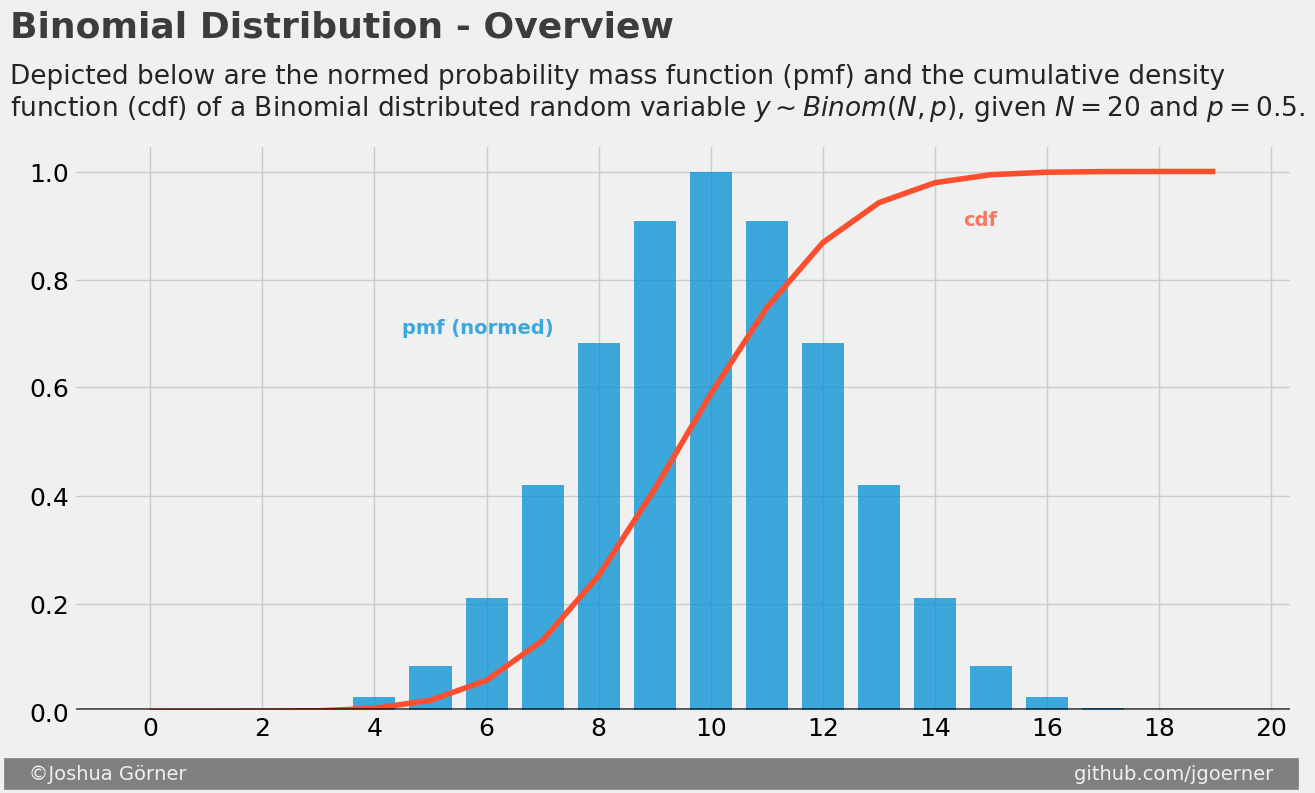

In [71]:
# %load ../src/binomial/01_general.py

***
## Parameters

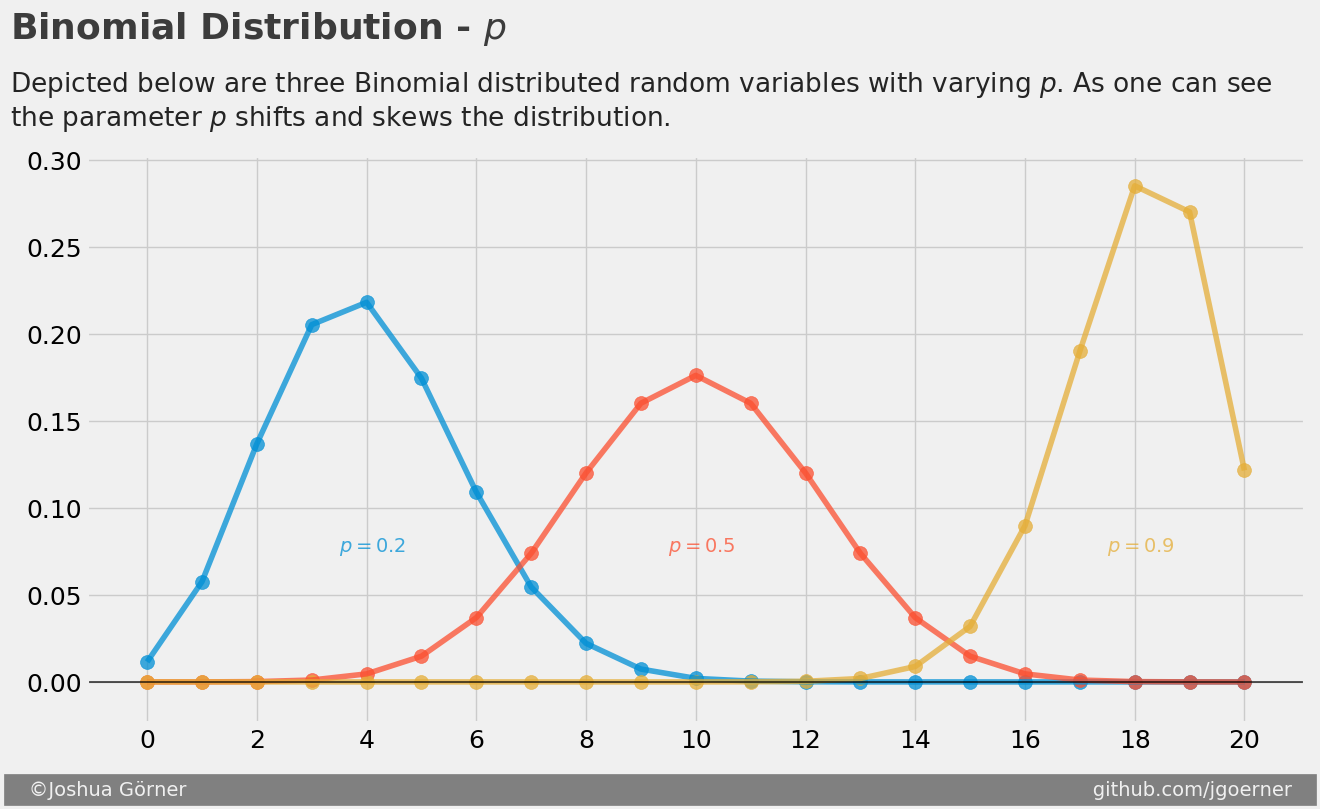

In [43]:
# %load ../src/binomial/02_p.py

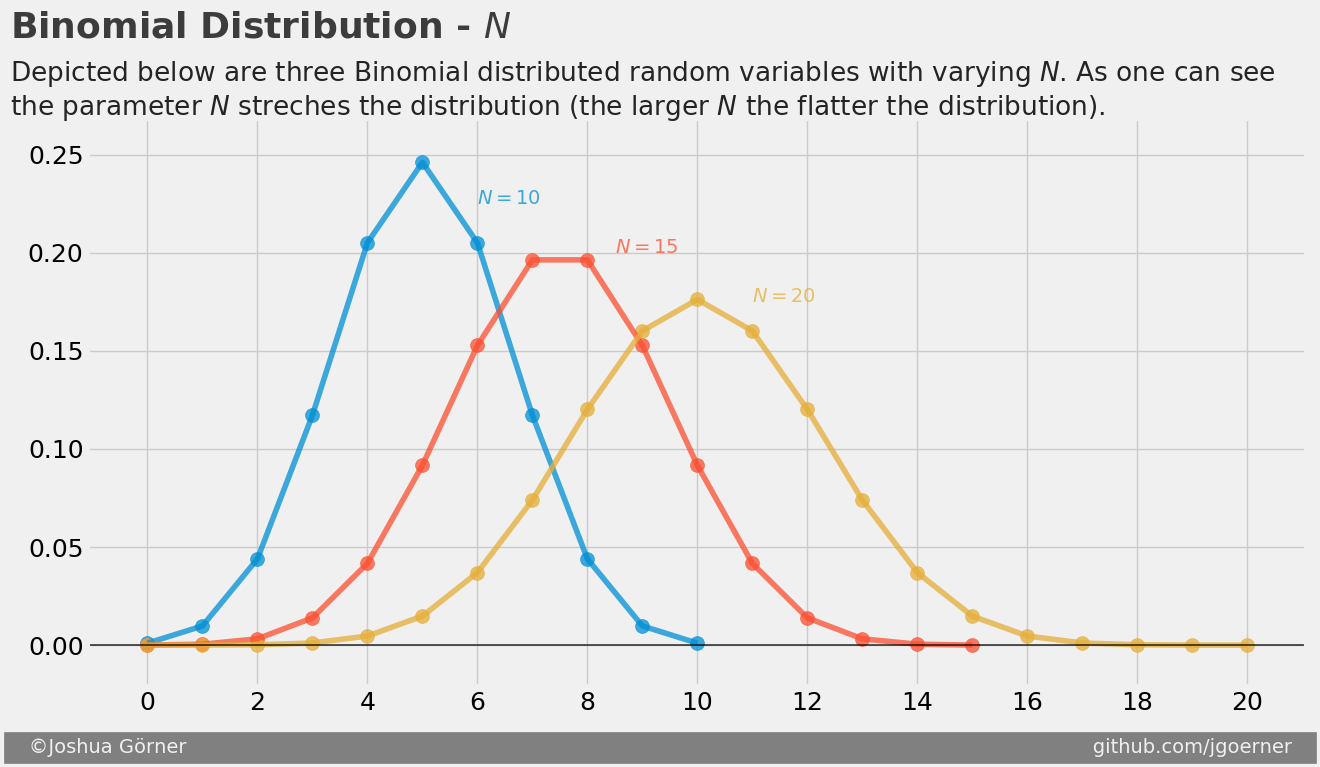

In [64]:
# %load ../src/binomial/03_n.py

*** 
## Implementation in Python
Multiple Python packages implement the Binomial distribution. One of those is the `stats.binom` module from the `scipy` package. The following methods are only an excerpt. For a full list of features the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) should be read.

### Random Variates
In order to generate a random sample from, the function `rvs` should be used. 

In [79]:
import numpy as np
from scipy.stats import binom

# draw a single sample
np.random.seed(42)
print(binom.rvs(p=0.3, n=10), end="\n\n")

# draw 10 samples
print(binom.rvs(p=0.3, n=10, size=10), end="\n\n")

2



[5 4 3 2 2 1 5 3 4 0]




### Probability Mass Function
The probability mass function can be accessed via the `pmf` function (mass instead of density since the Binomial distribution is discrete). Like the `rvs` method, the `pdf` allows for adjusting the $p$ and $n$ of the random variable:

pmf(X=1) = 0.12106082100000018

pmf(X=7) = 0.009001692000000002


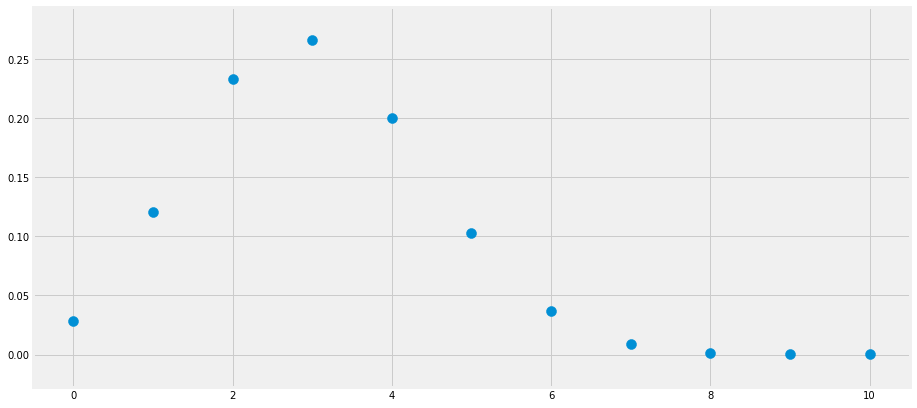

In [82]:
from scipy.stats import binom

# additional imports for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

# likelihood of x and y
x = 1
y = 7
print("pmf(X=1) = {}\npmf(X=7) = {}".format(binom.pmf(k=x, p=0.3, n=10), binom.pmf(k=y, p=0.3, n=10)))

# continuous pdf for the plot
x_s = np.arange(11)
y_s = binom.pmf(k=x_s, p=0.3, n=10)
plt.scatter(x_s, y_s, s=100);

### Cumulative Probability Density Function
The cumulative probability density function is useful when a probability range has to be calculated. It can be accessed via the `cdf` function:

In [2]:
from scipy.stats import binom

# probability of x less or equal 0.3
print("P(X <=3) = {}".format(binom.cdf(k=3, p=0.3, n=10)))

# probability of x in [-0.2, +0.2]
print("P(2 < X <= 8) = {}".format(binom.cdf(k=8, p=0.3, n=10) - binom.cdf(k=2, p=0.3, n=10)))

P(X <=3) = 0.6496107183999998

P(2 < X <= 8) = 0.6170735276999999


## Infering $N \& p$ - MCMC
If neither $N$ nor $p$ are given, they be estimated using Markov chain Monte Carlo simulation - implemented in Python's [PyMC3](https://github.com/pymc-devs/pymc3).

100%|██████████| 100500/100500 [00:58<00:00, 1714.63it/s]


95% of sampled ps are between 0.229 and 0.371

95% of sampled Ns are between 153.260 and 250.915


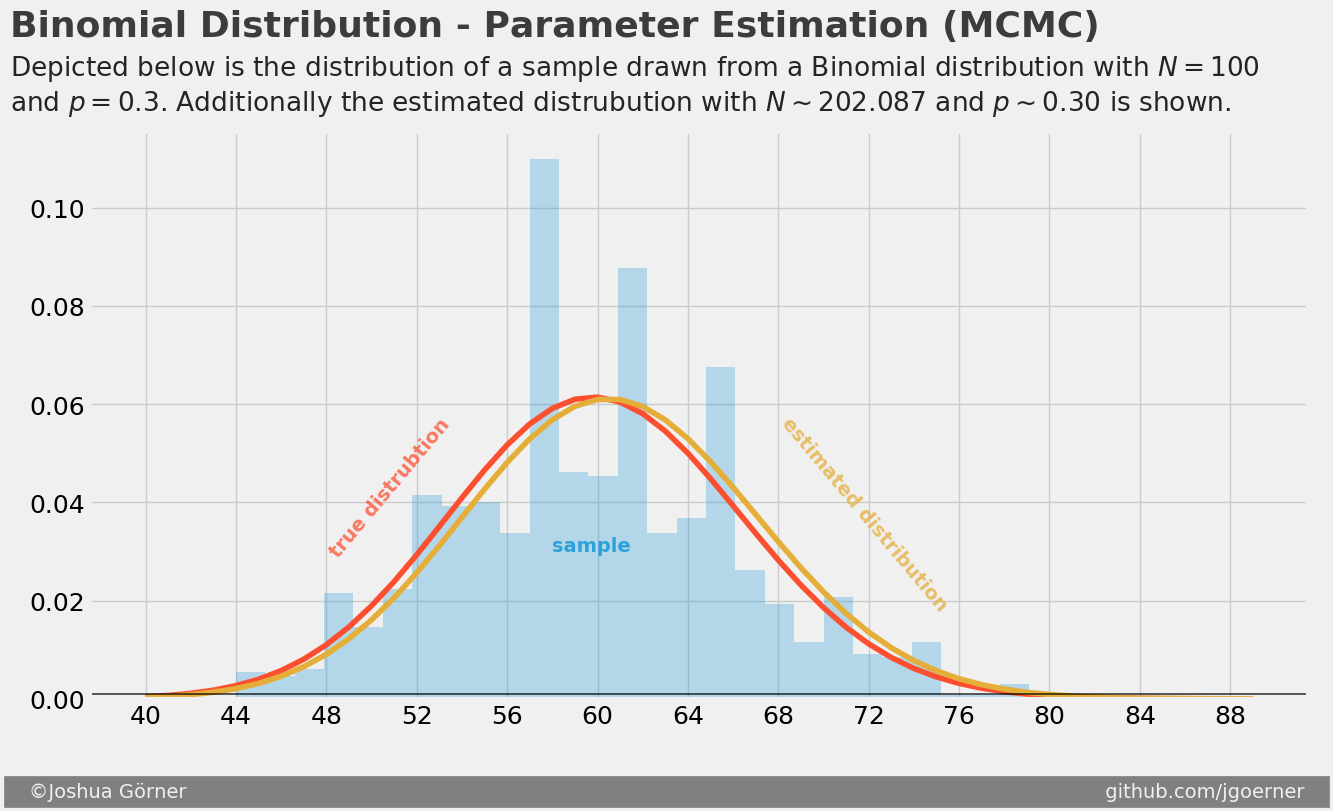

In [181]:
# %load ../src/binomial/04_mcmc_estimation.py

***
[1] - [Wikipedia. Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)